<a href="https://colab.research.google.com/github/niswatulsifa/niswatulsifa.github.io/blob/main/PCA_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Principal Component Analysis**

Principal component analysis (PCA) adalah teknik yang digunakan untuk menyederhanakan suatu data, dengan cara mentransformasi data secara linier sehingga terbentuk sistem koordinat baru dengan varians maksimum. PCA dapat digunakan untuk mereduksi dimensi suatu data tanpa mengurangi karakteristik data tersebut secara signifikan. 

### Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Kode tersebut mengimpor beberapa pustaka yang umum digunakan dalam analisis dan visualisasi data di Python. Pandas (`pd`) digunakan untuk manipulasi data, NumPy (`np`) digunakan untuk operasi numerik, Seaborn (`sns`) digunakan untuk visualisasi data, dan Matplotlib (`plt`) digunakan untuk membuat plot dan grafik.

###Import Data

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/niswatulsifa/data_iris/master/IrisDataset.csv', sep=',')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1. `df=pd.read_csv('https://raw.githubusercontent.com/niswatulsifa/data_iris/master/IrisDataset.csv', sep=',')`: Kode ini menggunakan fungsi `read_csv()` dari pustaka pandas (`pd`) untuk membaca file CSV dari URL yang diberikan. File CSV tersebut merupakan dataset Iris yang diambil dari repositori GitHub. Parameter `sep=','` digunakan untuk menentukan pemisah antar kolom dalam file CSV.

2. `df.head()`: Kode ini digunakan untuk mencetak lima baris pertama dari DataFrame `df`. Fungsi `head()` adalah salah satu metode pandas yang berguna untuk melihat beberapa baris awal dari sebuah DataFrame.

###menghitung jumlah kemunculan setiap nilai unik dalam kolom 'species'

In [ ]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Kode tersebut menghitung jumlah kemunculan setiap nilai unik dalam kolom 'species' dari DataFrame `df` dan menampilkannya.

###mengembalikan daftar kolom yang ada dalam DataFrame

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Kode tersebut mengembalikan daftar kolom yang ada dalam DataFrame `df`.

###memisahkan data dalam DataFrame


In [ ]:
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

1. X=df.iloc[:,0:4].values mengambil nilai-nilai dari kolom 0 hingga 3 dari DataFrame df dan menyimpannya dalam variabel X.

2. y=df.iloc[:,4].values mengambil nilai-nilai dari kolom ke-4 (kolom "species") dari DataFrame df dan menyimpannya dalam variabel y.

###membuat gambar histogram dari empat fitur dalam DataFrame 'X'

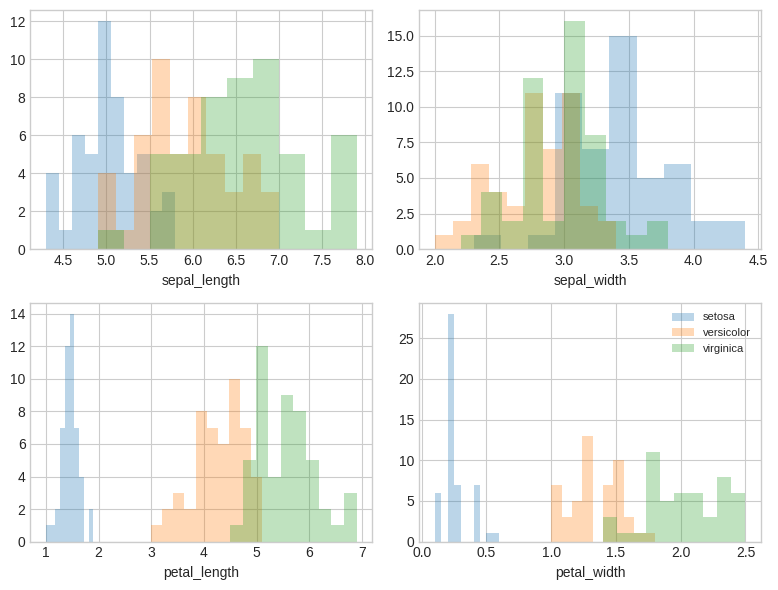

In [ ]:
label_dict={1: 'setosa',
           2: 'versicolor',
           3: 'virginica'}
feature_dict={0: 'sepal_length',1: 'sepal_width',2: 'petal_length',3: 'petal_width'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8,6))
    for i in range(4):
        plt.subplot(2,2,i+1)
        for lab in ('setosa','versicolor','virginica'):
            plt.hist(X[y==lab, i],
                    label=lab,
                    bins=10,
                    alpha=0.3)
        plt.xlabel(feature_dict[i])
    plt.legend(loc='upper right', fancybox=True,fontsize=8)
    
    plt.tight_layout()
    plt.show()

1. label_dict adalah kamus yang memetakan nilai numerik (1, 2, 3) ke nama spesies ("setosa", "versicolor", "virginica").

2. feature_dict adalah kamus yang memetakan indeks fitur (0, 1, 2, 3) ke nama fitur ("sepal_length", "sepal_width", "petal_length", "petal_width").

3. with plt.style.context('seaborn-whitegrid'): mengatur gaya plot menjadi "seaborn-whitegrid".

4. plt.figure(figsize=(8,6)) membuat gambar dengan ukuran 8x6.

5. loop for i in range(4), kode berikutnya akan membuat subplot untuk setiap fitur.

6. plt.subplot(2,2,i+1) mengatur subplot dengan ukuran 2x2.

7. for lab in ('setosa','versicolor','virginica') akan mengulangi tiga spesies dan membuat histogram untuk setiap spesies dengan menggunakan data yang sesuai.

8. plt.hist(X[y==lab, i], label=lab, bins=10, alpha=0.3) membuat histogram dengan menggunakan nilai fitur dari spesies yang sesuai. Parameter bins=10 mengatur jumlah bin histogram menjadi 10, dan alpha=0.3 mengatur transparansi histogram.

9. plt.xlabel(feature_dict[i]) memberi label sumbu x pada subplot saat ini dengan nama fitur yang sesuai.

10. plt.legend(loc='upper right', fancybox=True, fontsize=8) menampilkan legenda dengan label spesies di sudut kanan atas plot. Parameter fancybox=True mengatur tampilan kotak legenda yang bergaya.

11. plt.tight_layout() menyesuaikan tata letak plot agar lebih rapi.
plt.show() menampilkan plot histogram.

###melakukan penskalaan standar pada data menggunakan library scikit-learn

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)

###menghitung dan mencetak matriks kovarian dari data yang telah distandardisasi.

In [ ]:
mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)
print("Covariance Matrix \n%s" %cov_mat)

Covariance Matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


Kode tersebut melakukan normalisasi data menggunakan StandardScaler dan kemudian menghitung matriks kovarian dari data yang telah dinormalisasi. Hasilnya dicetak sebagai "Covariance Matrix" diikuti oleh nilai matriks kovarian.

###mencetak matriks kovarian menggunakan np.cov pada data yang telah distandardisasi.

In [ ]:
print("Numpy Covariance matrix \n%s" %np.cov(X_std.T))

Numpy Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


Kode tersebut menghitung matriks kovarian dari data yang telah dinormalisasi `X_std` menggunakan fungsi `np.cov()`. Hasilnya dicetak sebagai "Numpy Covariance matrix" diikuti oleh nilai matriks kovarian.

###menghitung eigenvector dan eigenvalue dari matriks kovarian, dan mencetak hasilnya.

In [ ]:
cov_mat=np.cov(X_std.T)

eig_vals, eig_vecs=np.linalg.eig(cov_mat)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigenvelues 
[2.93035378 0.92740362 0.14834223 0.02074601]


Kode tersebut menghitung eigenvektor dan eigennilai dari matriks kovarian menggunakan `np.linalg.eig()`. Hasilnya dicetak sebagai "Eigenvectors" diikuti oleh nilai eigenvektor, dan "Eigenvalues" diikuti oleh nilai eigennilai.

##Matriks Korelasi

###menghitung matriks korelasi, eigenvector, dan eigenvalue, kemudian mencetak hasilnya.

In [ ]:
corr_mat1=np.corrcoef(X_std.T)

eig_vals, eig_vecs=np.linalg.eig(corr_mat1)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigenvelues 
[2.91081808 0.92122093 0.14735328 0.02060771]


Kode tersebut menghitung matriks korelasi `corr_mat1` dari data yang telah dinormalisasi `X_std` menggunakan fungsi `np.corrcoef()`. Selanjutnya, kode menghitung eigenvektor dan eigennilai dari matriks korelasi tersebut menggunakan `np.linalg.eig()`. Hasilnya dicetak sebagai "Eigenvectors" diikuti oleh nilai eigenvektor, dan "Eigenvalues" diikuti oleh nilai eigennilai.

In [ ]:
cor_mat2=np.corrcoef(X.T)
eig_vals, eig_vecs=np.linalg.eig(cor_mat2)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigenvelues 
[2.91081808 0.92122093 0.14735328 0.02060771]


###menggunakan Singular Value Decomposition (SVD) pada transpose matriks X_std dan hasilnya disimpan dalam variabel u.

In [ ]:
u, s, v=np.linalg.svd(X_std.T)
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

Kode tersebut menghitung SVD (Singular Value Decomposition) dari matriks data yang telah dinormalisasi `X_std.T` menggunakan `np.linalg.svd()`. Hasilnya, nilai-nilai dari SVD disimpan dalam variabel `u`, `s`, dan `v`. Kemudian, kode mencetak nilai dari `u`, yang merupakan matriks utama dari SVD.

###memverifikasi norma eigenvector dan mencetak pesan jika valid.

In [ ]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print("Everithing is ok")

Everithing is ok


Kode tersebut melakukan iterasi melalui setiap vektor eigen `ev` yang telah di-transpose (`eig_vecs.T`). Pada setiap iterasi, kode menggunakan `np.linalg.norm()` untuk menghitung norma dari vektor eigen tersebut, dan kemudian memastikan bahwa norma tersebut mendekati nilai 1 dengan menggunakan `np.testing.assert_array_almost_equal()`. Jika semua vektor eigen memiliki norma mendekati 1, maka pesan "Everything is ok" akan dicetak. Kode ini digunakan untuk memverifikasi bahwa vektor eigen yang dihitung benar-benar merupakan vektor unit.

###Membuat daftar pasangan (nilai eigen, vektor eigen)

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9108180837520528
0.9212209307072249
0.1473532783050959
0.020607707235624884


Kode tersebut mengurutkan eigennilai dalam urutan menurun dan mencetaknya. Eigennilai adalah angka yang menggambarkan variasi atau pentingnya setiap vektor eigen dalam matriks data.

###Menghitung persentase variasi dan kumulatif menggunakan eigenvalues terurut.

In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

Kode tersebut menghitung persentase variasi yang dijelaskan oleh setiap eigennilai, serta menghitung akumulasi persentase variasi dari eigennilai tersebut.

###membuat gambar persentase variasi dan variasi kumulatif yang dijelaskan.

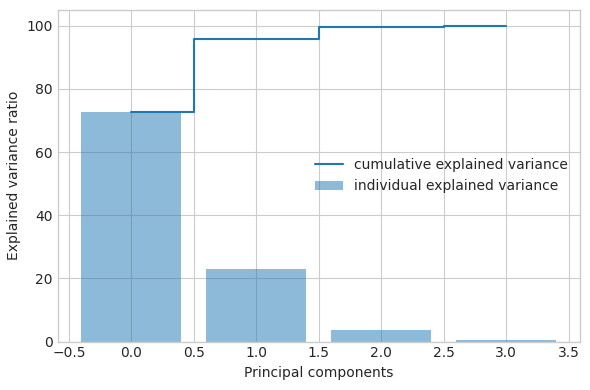

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

1. with plt.style.context('seaborn-whitegrid'):: Kode ini mengatur gaya plot menggunakan seaborn-whitegrid untuk tampilan yang lebih rapi.

2. plt.figure(figsize=(6, 4)): Kode ini membuat objek gambar dengan ukuran 6x4 menggunakan plt.figure().

3. plt.bar(range(4), var_exp, alpha=0.5, align='center', label='individual explained variance'): Kode ini membuat grafik batang dengan tinggi yang sesuai dengan persentase variasi yang dijelaskan oleh setiap komponen utama. Garis batas pada setiap batang diatur di tengah (align='center'). Garis batas ditampilkan dengan transparansi alpha=0.5. Label untuk grafik batang ini adalah 'individual explained variance'.

4. plt.step(range(4), cum_var_exp, where='mid', label='cumulative explained variance'): Kode ini membuat grafik langkah yang menunjukkan akumulasi variasi yang dijelaskan oleh komponen utama. Grafik langkah menunjukkan kenaikan nilai secara bertahap. Label untuk grafik langkah ini adalah 'cumulative explained variance'.

5. plt.ylabel('Explained variance ratio'): Kode ini menetapkan label sumbu y sebagai 'Explained variance ratio', yang menggambarkan persentase variasi yang dijelaskan.

6. plt.xlabel('Principal components'): Kode ini menetapkan label sumbu x sebagai 'Principal components', yang menggambarkan komponen utama.

7. plt.legend(loc='best'): Kode ini menampilkan legenda dengan posisi terbaik (loc='best') yang mencakup label-label yang ditetapkan sebelumnya.

8. plt.tight_layout(): Kode ini mengatur tata letak plot secara otomatis untuk memastikan elemen-elemen plot terlihat dengan baik.

###menggabungkan dua vektor eigen terpilih menjadi sebuah matriks

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


1. matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))`: Kode ini menggabungkan dua vektor eigen teratas dari `eig_pairs` ke dalam matriks `matrix_w`. Fungsi `np.hstack()` digunakan untuk menggabungkan vektor secara horizontal. `eig_pairs[0][1]` adalah vektor eigen teratas pertama, sedangkan `eig_pairs[1][1]` adalah vektor eigen teratas kedua. Fungsi `reshape(4,1)` digunakan untuk mengubah dimensi vektor menjadi `(4,1)` sehingga dapat digabungkan dalam matriks. Hasilnya disimpan dalam variabel `matrix_w`.

2. print('Matrix W:\n', matrix_w)`: Kode ini mencetak matriks `matrix_w` dengan pesan "Matrix W:".

###mengalikan matriks X_std dengan matriks W dan menyimpan hasilnya dalam matriks Y.

In [ ]:
Y = X_std.dot(matrix_w)

Y = X_std.dot(matrix_w): Kode ini melakukan perkalian antara matriks data yang telah dinormalisasi X_std dengan matriks transformasi matrix_w menggunakan operator dot(). Hasilnya disimpan dalam variabel Y, yang merupakan matriks hasil transformasi.

###membuat scatter plot dua dimensi dengan warna berbeda untuk setiap label.

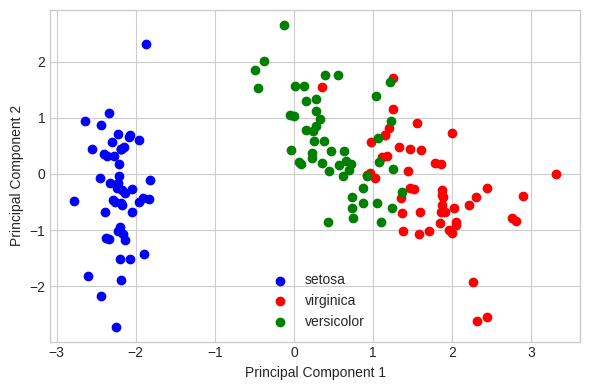

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('setosa', 'virginica', 'versicolor'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

Kode tersebut membuat scatter plot dari hasil transformasi `Y` dengan dua komponen utama. Setiap kelas ditampilkan dengan warna yang berbeda dalam plot tersebut.

###mengubah data 'X_std' menjadi matriks 'Y_sklearn' berdimensi dua.


In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

###membuat scatter plot dua dimensi dengan warna berbeda untuk setiap label

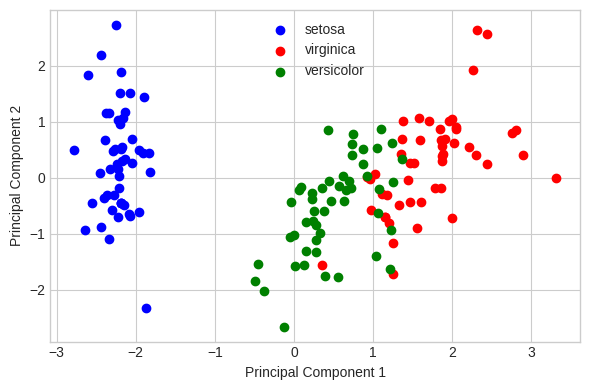

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('setosa', 'virginica', 'versicolor'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper center')
    plt.tight_layout()
    plt.show()

Kode tersebut menggunakan metode PCA dari scikit-learn untuk melakukan reduksi dimensi dan membuat scatter plot dari hasil transformasi. Hasil transformasi disimpan dalam variabel `Y_sklearn`, dan plot tersebut menampilkan titik-titik dengan warna yang berbeda untuk setiap kelas.

###DataFrame 'data' yang berisi kolom 'X' dan 'Y' yang berisi nilai dari matriks Y_sklearn.

In [ ]:
data=pd.DataFrame(Y_sklearn)
data.columns=['X','Y']
data

,X,Y
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


Kode tersebut membuat sebuah DataFrame dari hasil transformasi PCA (`Y_sklearn`). DataFrame tersebut memiliki dua kolom dengan nama 'X' dan 'Y', yang mewakili komponen utama pertama dan kedua.

In [ ]:
data['species']=df['species']
data

,X,Y,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa
...,...,...,...
145,1.870522,0.382822,virginica
146,1.558492,-0.905314,virginica
147,1.520845,0.266795,virginica
148,1.376391,1.016362,virginica


Kode tersebut menambahkan kolom 'species' ke DataFrame `data` dan mengisinya dengan nilai dari kolom 'species' pada DataFrame `df`.